In [5]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Recoleccion de datos y procesamiento

In [6]:
car_data=pd.read_csv('C:/Users/USUARIO/Desktop/Datos/car data.csv')

In [8]:
#inspeccionando las primeras 5 filas del dataFrame
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
car_data.shape

(301, 9)

In [15]:
car_data['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [16]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [19]:
car_data['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [21]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [24]:
#verificando la disteibucion de datos categoricos
print(car_data.Fuel_Type.value_counts())
print("")
print(car_data.Seller_Type.value_counts())
print("")
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [28]:
car_data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2},"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)

In [29]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [31]:
#verificando la disteibucion de datos categoricos
print(car_data.Fuel_Type.value_counts())
print("")
print(car_data.Seller_Type.value_counts())
print("")
print(car_data.Transmission.value_counts())

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64

0    195
1    106
Name: Seller_Type, dtype: int64

0    261
1     40
Name: Transmission, dtype: int64


In [35]:
#Separando los datos en datos de entrenamiento y datos de prueba
X=car_data.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y=car_data['Selling_Price']

In [37]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [39]:
model=LinearRegression()

In [40]:
model.fit(X_train,Y_train)

LinearRegression()

In [42]:
#Evaluacion del modelo
prediccion=model.predict(X_train)


In [43]:
#R_Squared error
#en regresion lineal se utiliza esta metrica de  raiz cuadrada
error_score=metrics.r2_score(prediccion,Y_train)

In [44]:
error_score

0.8635655509199299

In [46]:
prediccion=model.predict(X_test)
error_score=metrics.r2_score(prediccion,Y_test)
error_score

0.8062199941174047

In [47]:
#visualizar los precios y predecir

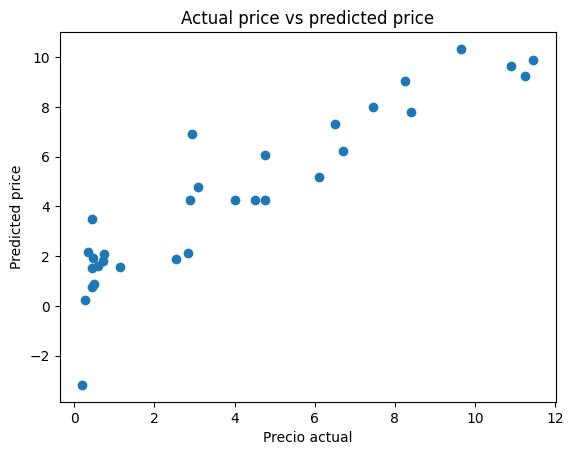

In [48]:
plt.scatter(Y_test,prediccion)
plt.xlabel("Precio actual")
plt.ylabel('Predicted price')
plt.title("Actual price vs predicted price")
plt.show()

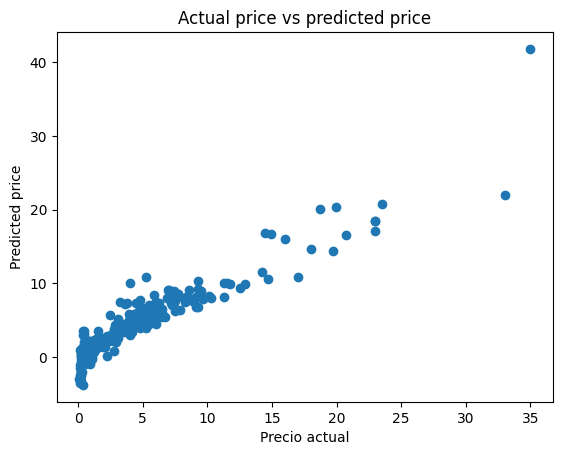

In [50]:
prediccion=model.predict(X_train)
plt.scatter(Y_train,prediccion)
plt.xlabel("Precio actual")
plt.ylabel('Predicted price')
plt.title("Actual price vs predicted price")
plt.show()

In [51]:
#Regresion Lasso

In [52]:
model=Lasso()
model.fit(X_train,Y_train)

Lasso()

In [55]:
prediccion=model.predict(X_test)
score=metrics.r2_score(prediccion,Y_test)

score

0.7711110403265475

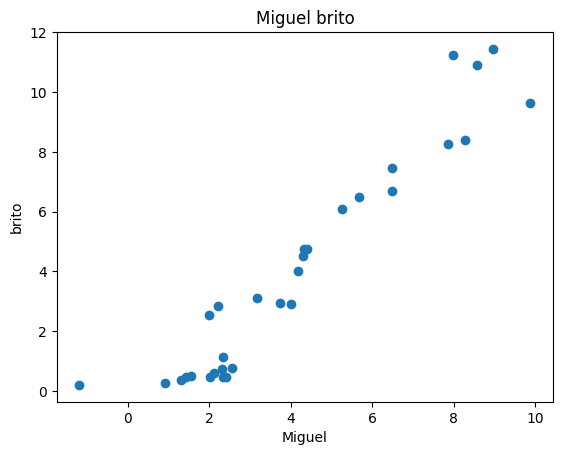

In [56]:
plt.scatter(prediccion,Y_test)
plt.xlabel("Miguel")
plt.ylabel("brito")
plt.title("Miguel brito")
plt.show()